# 1. Write a python program which searches all the product under a particular product from www.amazon.in. The product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.

In [98]:
import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
import time

In [99]:
driver = webdriver.Chrome()
driver.get("https://www.amazon.in/")
time.sleep(5)

In [100]:
product= driver.find_element(By.XPATH,'//*[@id="twotabsearchtextbox"]')
product.send_keys('guitars')

In [101]:
search = driver.find_element(By.XPATH,'//*[@id="nav-search-submit-button"]')
search.click()

# 2. In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then scrape all the products available under that product name. Details to be scraped are: "Brand Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.

In [102]:
product_url=[]
start=0
end=3
for page in range(start,end):
    url=driver.find_elements(By.XPATH,'//h2[@class="a-size-mini a-spacing-none a-color-base s-line-clamp-4"]/a')
    for i in url:
        product_url.append(i.get_attribute('href'))
    next_button=driver.find_elements(By.XPATH,'/html/body/div[1]/div[1]/div[1]/div[1]/div/span[1]/div[1]/div[67]/div/div/span/a[3]')

In [106]:
len(product_url)

195

In [75]:
product

['https://www.amazon.in/sspa/click?ie=UTF8&spc=MToyMTI0MjcyNTUwMzIwMDM5OjE3MDc0NTcwOTQ6c3BfYXRmOjMwMDAzMTMyOTU5MDczMjo6MDo6&url=%2FKadence-A281BK-Professional-Acoustic-Rosewood%2Fdp%2FB0CD7D6C6R%2Fref%3Dsr_1_1%3Fcrid%3D11J4DNYWXHHBP%26keywords%3Dguitars%26qid%3D1707457094%26sprefix%3Dguitars%252Caps%252C232%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1',
 'https://www.amazon.in/sspa/click?ie=UTF8&spc=MToyMTI0MjcyNTUwMzIwMDM5OjE3MDc0NTcwOTQ6c3BfYXRmOjMwMDAyMjkzODAyNjEzMjo6MDo6&url=%2FKadence-Professional-Acoustic-Rosewood-Natural%2Fdp%2FB0CC927DLN%2Fref%3Dsr_1_2%3Fcrid%3D11J4DNYWXHHBP%26keywords%3Dguitars%26qid%3D1707457094%26sprefix%3Dguitars%252Caps%252C232%26sr%3D8-2-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1',
 'https://www.amazon.in/sspa/click?ie=UTF8&spc=MToyMTI0MjcyNTUwMzIwMDM5OjE3MDc0NTcwOTQ6c3BfYXRmOjMwMDAxNTUzNzk3OTIzMjo6MDo6&url=%2FKadence-Frontier-Acoustic-Guitar-Strings%2Fdp%2FB078GTJP5Y%2Fref%3Dsr_1_3%3Fcrid%3D11J4DNYWXHHBP%26keywords%3Dguitars%26qi

In [107]:
import pandas as pd
df=pd.DataFrame ({'PRODUCT_URL':product_url})
print (df)

                                           PRODUCT_URL
0    https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1    https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2    https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3    https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
4    https://www.amazon.in/Juarez-Acoustic-Cutaway-...
..                                                 ...
190  https://www.amazon.in/NOVA-SP1-Acoustic-Acoust...
191  https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
192  https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
193  https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
194  https://www.amazon.in/sspa/click?ie=UTF8&spc=M...

[195 rows x 1 columns]


In [120]:
brand_name=[]
price=[]
return_exchange=[]
expected_delivery=[]
availability=[]

for i in product_url:
    driver.get(i)
    time.sleep(5)
    try:
        name=driver.find_element(By.XPATH,'//*[@id="productTitle"]')
        brand_name.append(name.text)
        price1=driver.find_element(By.XPATH,'//span[@class="a-price-whole"]')
        price.append(price1.text)
        return_exchange1=driver.find_element(By.XPATH,'//span[@class="a-size-small a-color-link a-text-normal"]')
        return_exchange.append(return_exchange1.text)
        expected_delivery1=driver.find_element(By.XPATH,'//div[@class="a-spacing-base"]')
        expected_delivery.append(expected_delivery1.text)
        availability1=driver.find_element(By.XPATH,'//div[@class="a-section a-spacing-none a-spacing-top-micro }"]')
        availability.append(availability1.text)
    except NoSuchElementException:
            brand_name('-')
            price('-')
            return_exchange('-')
            expected_delivery('-')
            availability('-')

In [126]:
len(availability)

195

In [131]:
 availability

['In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'Only 1 left in stock.',
 'Only 1 left in stock.',
 'In stock',
 'In stock',
 'Only 1 left in stock.',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'Only 2 left in stock.',
 'Only 2 left in stock.',
 'In stock',
 '',
 'Only 2 left in stock.',
 'In stock',
 'In stock',
 'Only 2 left in stock.',
 'In stock',
 'In stock',
 'In stock',
 'Only 1 left in stock.',
 'In stock',
 'Only 1 left in stock.',
 'In stock',
 'In stock',
 'Only 2 left in stock.',
 'Only 1 left in stock.',
 'In stock',
 'In stock',
 'In st

In [133]:
import pandas as pd
df1=pd.DataFrame ({'brand_name':brand_name,'price':price,'return_exchange':return_exchange,'expected_delivery':expected_delivery,'availability':availability})
print (df1)

                                            brand_name   price  \
0    Kadence A281BK Professional Acoustic Rosewood ...   6,499   
1    Kadence A281 Professional Acoustic Rosewood gu...   6,499   
2    Kadence rosewood Guitar Frontier Series, Elect...   5,499   
3    Kadence Frontier guitar with Online Guitar lea...   4,999   
4    Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...   1,999   
..                                                 ...     ...   
190  Enya NOVA Go SP1 Carbon Fiber Acoustic Electri...  25,460   
191  Vault DA20 Dreadnought Acoustic Guitar With Gi...   4,654   
192  ROCKON RA-40 BLACK 40 INCHES ACOUSTIC GUITAR W...   8,999   
193  Samara SA39CE CS 39" Cutaway Electro-Acoustic ...   6,900   
194  BLUEBERRY B-D38, Acoustic Guitar Kit Inbuilt T...   2,720   

        return_exchange                             expected_delivery  \
0         Free Delivery   FREE delivery Tuesday, 13 February. Details   
1         Free Delivery   FREE delivery Tuesday, 13 February.

# 3. Write a python program to access the search bar and search button on images.google.com and scrape 10 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.

In [169]:
import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
import time

In [178]:
driver = webdriver.Chrome()
driver.get("https://images.google.com/")
time.sleep(5)

In [179]:
search_bar= driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
search_bar.send_keys('fruits')
search=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div/span')
search.click()

In [223]:
image_url=[]

url1=driver.find_elements(By.XPATH,'//div[@class="fR600b islir"]/img')
for i in url1:
        image_url.append(i.get_attribute('data-src'))

In [187]:
len(image_url)

400

(['',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSVzLhgZCYHq9t8Vo91Qwx2JAT-dccrRB5I-A&usqp=CAU',
  'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTrBI9mTbfx8DyaalFAEBZhiOYxHQsOaWs3sg&usqp=CAU',
  'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ_V6ymJ4gu64n9BvlIdxYywYI1nBzpZGX5MA&usqp=CAU',
  'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTefhw0LwMgaEPs4HjtcRTzFkvUHgLHG0TgkA&usqp=CAU',
  'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTM1cY5MzZvBFpmmD2hg9wuPt8LeG06O650uQ&usqp=CAU',
  'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSKlvdxbnKWN6NZyzlCflmLUKTt5lhzm049XQ&usqp=CAU',
  'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRWx1X-MisBtID7Sh0ojxnhYhZaFWlD_RqFfw&usqp=CAU',
  'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR4GFscrh7YagjLPPWaBJCjbiQUkp9GzFFGGg&usqp=CAU',
  'https://encrypted-tbn0.gstatic.com/im
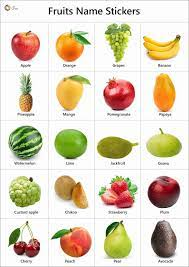
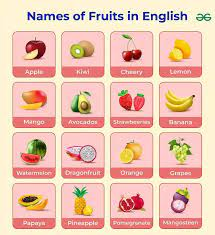
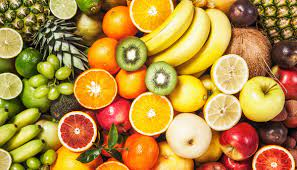
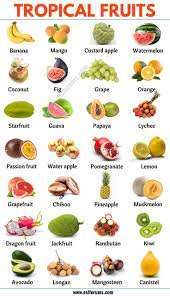
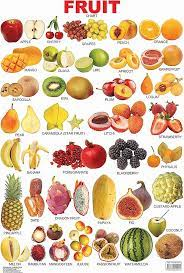
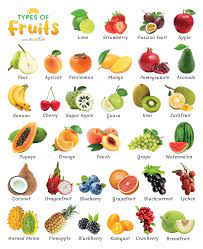
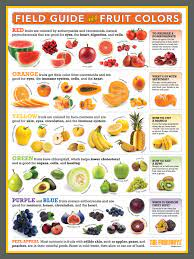
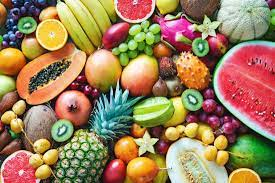
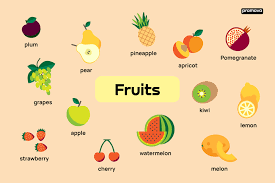
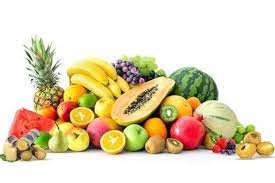
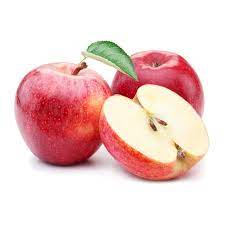
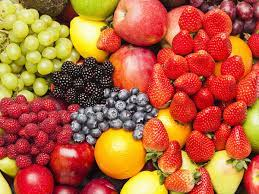
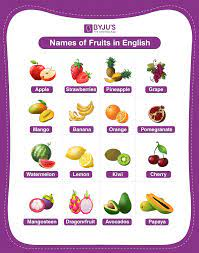
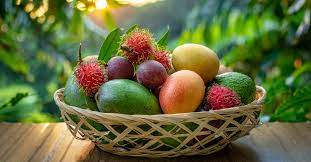
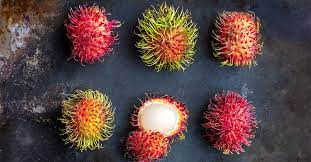
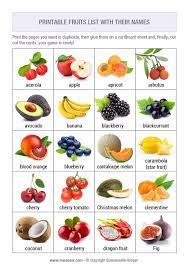
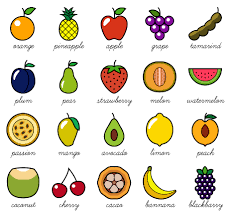
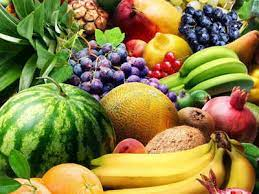
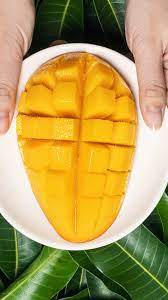
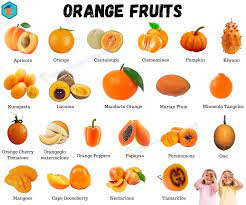

In [190]:
(image_url,10)

In [211]:
import pandas as pd
df2=pd.DataFrame ({'image_url':image_url})
df2.head(10)

,image_url
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
5,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
6,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
7,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
8,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
9,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


,image_url
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
5,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
6,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
7,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
8,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
9,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


In [198]:
driver = webdriver.Chrome()
driver.get("https://images.google.com/")
time.sleep(5)

In [199]:
search_bar= driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
search_bar.send_keys('cars')
search=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div/span')
search.click()

In [201]:
carimage_url=[]

car=driver.find_elements(By.XPATH,'//div[@class="fR600b islir"]/img')
for i in url1:
        carimage_url.append(i.get_attribute('src'))

In [210]:
import pandas as pd
car_img=pd.DataFrame ({'carimage_url':carimage_url})
car_img.head(10)

,carimage_url
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
5,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
6,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
7,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
8,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
9,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


In [219]:
driver = webdriver.Chrome()
driver.get("https://images.google.com/")
time.sleep(5)

In [220]:
search_bar= driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
search_bar.send_keys('Machine Learning')
search=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div/span')
search.click()

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]

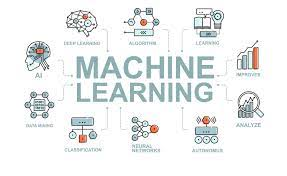
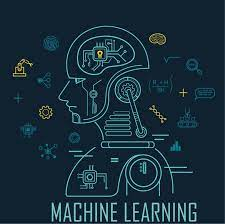
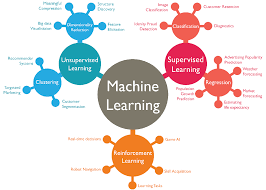
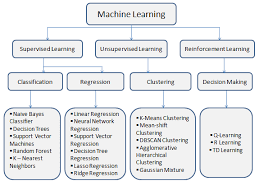
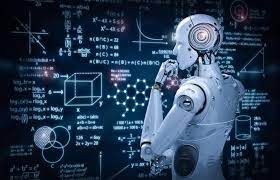
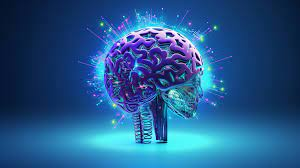
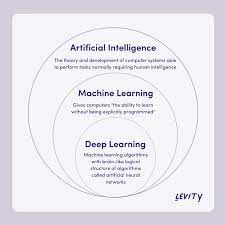
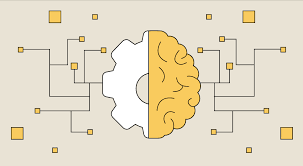
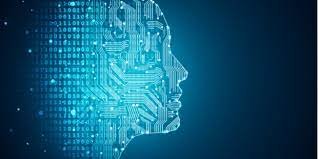
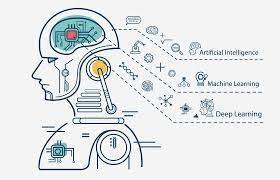
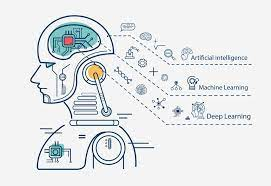
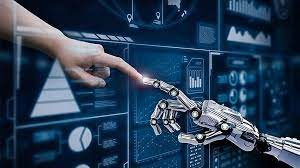
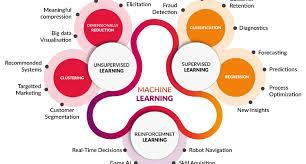
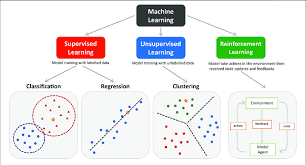
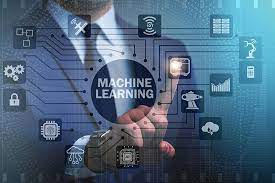
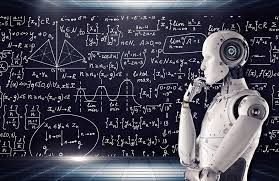
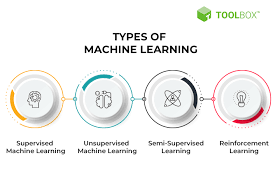
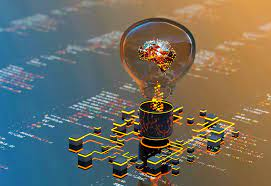
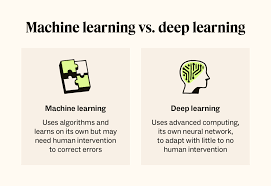
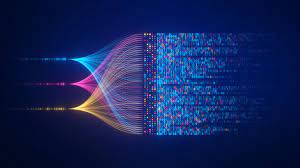

In [227]:
MLIMG_url=[]
ML=driver.find_elements(By.XPATH,'//div[@class="fR600b islir"]/img')
for i in ML:
        MLIMG_url.append(i.get_attribute('src'))
print(MLIMG_url)

In [228]:
import pandas as pd
ML_img=pd.DataFrame ({'MLIMG_url':MLIMG_url})
ML_img.head(10)

,MLIMG_url
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
3,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
5,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
6,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
7,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
8,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
9,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


# 4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.

In [229]:
import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
import time

In [259]:
driver = webdriver.Chrome()
driver.get("https://www.flipkart.com/")
time.sleep(5)

In [260]:
search_bar= driver.find_element(By.XPATH,'/html/body/div[1]/div/div[1]/div/div/div/div/div[1]/div/div[1]/div/div[1]/div[1]/header/div[1]/div[2]/form/div/div/input')
search_bar.send_keys('smartphones')
search=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[1]/div/div/div/div/div[1]/div/div[1]/div/div[1]/div[1]/header/div[1]/div[2]/form/div/button')
search.click()

In [261]:
phone_url=[]
url=driver.find_elements(By.XPATH,'//div[@class="_2kHMtA"]/a')
for i in url:
        phone_url.append(i.get_attribute('href'))

In [262]:
phone_url

['https://www.flipkart.com/vivo-t2x-5g-marine-blue-128-gb/p/itmcb8f0f6a85d5d?pid=MOBGZBFU4HBKKFSN&lid=LSTMOBGZBFU4HBKKFSNXXMXTS&marketplace=FLIPKART&q=smartphones&store=tyy%2F4io&spotlightTagId=BestsellerId_tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=Search&iid=384f50af-6281-498d-b120-58ade246053a.MOBGZBFU4HBKKFSN.SEARCH&ppt=sp&ppn=sp&ssid=f2aghr2dpc0000001707553801728&qH=6ea4465d0add4685',
 'https://www.flipkart.com/vivo-t2x-5g-marine-blue-128-gb/p/itmcb8f0f6a85d5d?pid=MOBGZBFUPTU7DNCA&lid=LSTMOBGZBFUPTU7DNCALOZWX1&marketplace=FLIPKART&q=smartphones&store=tyy%2F4io&srno=s_1_2&otracker=search&otracker1=search&fm=organic&iid=384f50af-6281-498d-b120-58ade246053a.MOBGZBFUPTU7DNCA.SEARCH&ppt=hp&ppn=homepage&ssid=f2aghr2dpc0000001707553801728&qH=6ea4465d0add4685',
 'https://www.flipkart.com/vivo-t2x-5g-aurora-gold-128-gb/p/itmcb8f0f6a85d5d?pid=MOBGZBFUQMTHYHSH&lid=LSTMOBGZBFUQMTHYHSHQ0KBA5&marketplace=FLIPKART&q=smartphones&store=tyy%2F4io&srno=s_1_3&otracker=search&otracker1=s

In [263]:
import pandas as pd
phone_urldf=pd.DataFrame ({'phone_url':phone_url})
print (phone_urldf)

                                            phone_url
0   https://www.flipkart.com/vivo-t2x-5g-marine-bl...
1   https://www.flipkart.com/vivo-t2x-5g-marine-bl...
2   https://www.flipkart.com/vivo-t2x-5g-aurora-go...
3   https://www.flipkart.com/vivo-t2x-5g-glimmer-b...
4   https://www.flipkart.com/vivo-t2x-5g-aurora-go...
5   https://www.flipkart.com/vivo-t2x-5g-marine-bl...
6   https://www.flipkart.com/vivo-t2x-5g-glimmer-b...
7   https://www.flipkart.com/vivo-t2x-5g-glimmer-b...
8   https://www.flipkart.com/poco-c51-royal-blue-6...
9   https://www.flipkart.com/motorola-g34-5g-ocean...
10  https://www.flipkart.com/motorola-g34-5g-ocean...
11  https://www.flipkart.com/vivo-t2-5g-nitro-blaz...
12  https://www.flipkart.com/vivo-t2-5g-velocity-w...
13  https://www.flipkart.com/vivo-t2-5g-nitro-blaz...
14  https://www.flipkart.com/poco-c51-power-black-...
15  https://www.flipkart.com/vivo-t2-5g-velocity-w...
16  https://www.flipkart.com/poco-c55-forest-green...
17  https://www.flipkart.com

In [257]:
phone_name=[]
primary_camera = []
secondary_camera = []
display_size = []
battery_capacity = []
price = []

for i in phone_url:
    driver.get(i)
    time.sleep(5)
    try:
        pname=driver.find_element(By.XPATH,'//span[@class="B_NuCI"]')
        phone_name.append(pname.text)
        pprimary_camera=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[5]/table/tbody/tr[2]/td[2]')
        primary_camera.append(pprimary_camera.text)
        psecondary_camera=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[5]/table/tbody/tr[6]/td[2]/ul')
        secondary_camera.append(psecondary_camera.text)
        pdisplay_size=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[2]/table/tbody/tr[1]/td[2]/ul')
        display_size.append(pdisplay_size.text)
        pbattery_capacity=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[10]/table/tbody/tr/td[2]/ul')
        battery_capacity.append(pbattery_capacity.text)
        pprice=driver.find_element(By.XPATH,'//div[@class="_30jeq3 _16Jk6d"]')
        price.append(pprice.text)
    except NoSuchElementException:
            phone_name('-')
            primary_camera('-')
            secondary_camera('-')
            display_size('-')
            battery_capacity('-')
            price('-')

NameError: name 'NoSuchElementException' is not defined

# 6. Write a program to scrap all the available details of best gaming laptops from digit.in.

In [267]:
import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
import time

In [281]:
driver = webdriver.Chrome()
driver.get("https://www.forbes.com/billionaires/")
time.sleep(5)

In [286]:
table = []

data=driver.find_element(By.XPATH,'//div[@class="Table_dataCell__2QCve"]')
table.append(data.text)

WebDriverException: Message: disconnected: not connected to DevTools
  (failed to check if window was closed: disconnected: not connected to DevTools)
  (Session info: chrome=121.0.6167.161)
Stacktrace:
	GetHandleVerifier [0x00007FF7239F5E42+3538674]
	(No symbol) [0x00007FF723614C02]
	(No symbol) [0x00007FF7234C5AEB]
	(No symbol) [0x00007FF7234B273F]
	(No symbol) [0x00007FF7234B22B0]
	(No symbol) [0x00007FF7234C7BF1]
	(No symbol) [0x00007FF72354B437]
	(No symbol) [0x00007FF72352EE53]
	(No symbol) [0x00007FF7234FF514]
	(No symbol) [0x00007FF723500631]
	GetHandleVerifier [0x00007FF723A26CAD+3738973]
	GetHandleVerifier [0x00007FF723A7C506+4089270]
	GetHandleVerifier [0x00007FF723A74823+4057299]
	GetHandleVerifier [0x00007FF723745C49+720121]
	(No symbol) [0x00007FF72362126F]
	(No symbol) [0x00007FF72361C304]
	(No symbol) [0x00007FF72361C432]
	(No symbol) [0x00007FF72360BD04]
	BaseThreadInitThunk [0x00007FF84385257D+29]
	RtlUserThreadStart [0x00007FF844FEAA58+40]
